# Analysing and Plotting the output of our C++ (Extended) Kalman Filter

Doing the plotting in C++ would be hard and annoying

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.patches import Ellipse, Circle
import os

In [53]:
filename = "./recorded_sensor_data/field_data_3/auto/kf_out.csv"
print(os.stat(filename).st_mtime)
data = np.genfromtxt(filename, delimiter=",", dtype=np.float64)

x = data[:,0]
y = data[:,1]
yaw = data[:,2]
dx = data[:,3]
dy = data[:,4]
dyaw = data[:,5]
ddx = data[:,6]
ddy = data[:,7]
ddyaw = data[:,8]

cov_x = data[:,9]
cov_y = data[:,19]
cov_yaw = data[:,29]
cov_dx = data[:,39]
cov_dy = data[:,49]
cov_dyaw = data[:,59]
cov_ddx = data[:,69]
cov_ddy = data[:,79]
cov_ddyaw = data[:,89]

1519255800.5693517


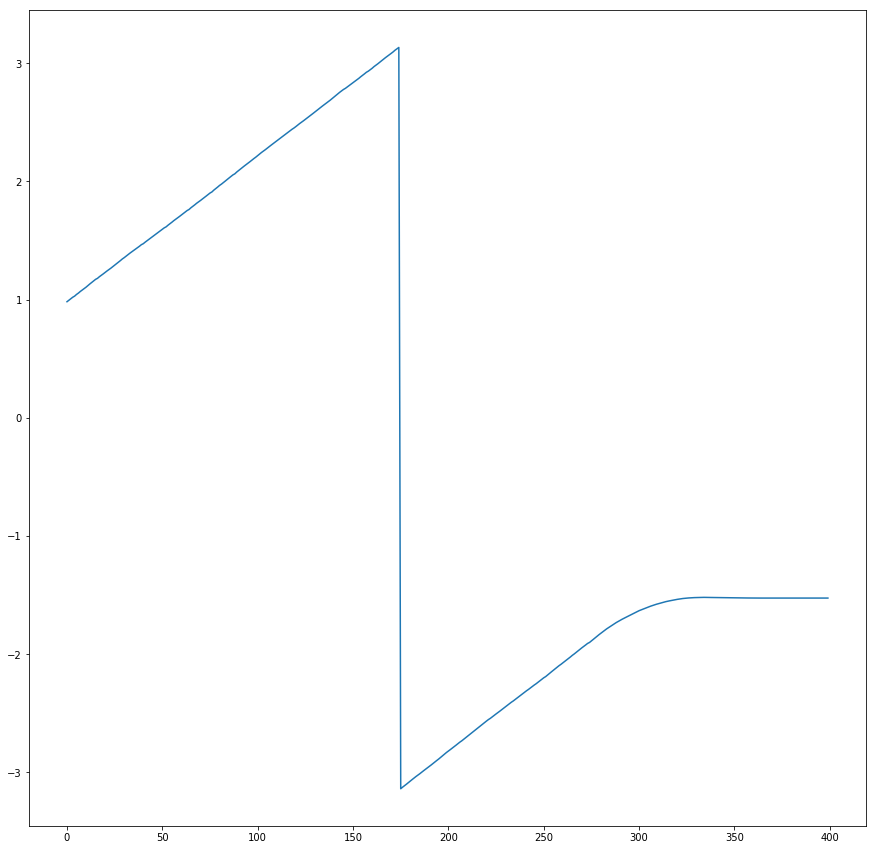

In [54]:
plt.figure(figsize=(15,15))
plt.plot(yaw[200:600])
plt.show()

approximate circle radius: 0.324815038


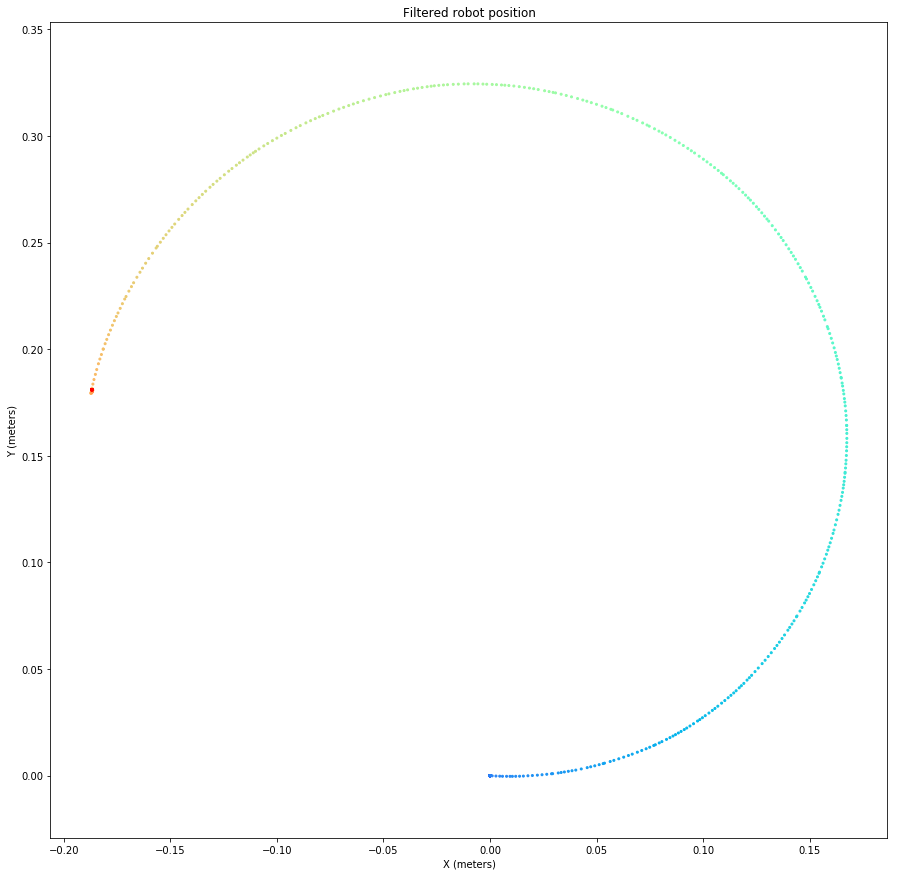

In [55]:
T_begin = 0
T_end = 650 # x.shape[0]
skip=1

print("approximate circle radius:", np.max(y[T_begin:T_end]) - np.min(y[T_begin:T_end]))

plt.figure(figsize=(15,15))
colors = cm.rainbow(np.linspace(0, 1, (T_end - T_begin) // skip))
plt.scatter(x[T_begin:T_end:skip],y[T_begin:T_end:skip], s=4, color=colors[T_begin:T_end])
# plt.quiver(x[T_begin:T_end:skip],y[T_begin:T_end:skip], np.cos(yaw[T_begin:T_end:skip]), np.sin(yaw[T_begin:T_end:skip]), width=0.001)
plt.ylabel("Y (meters)")
plt.xlabel("X (meters)")
plt.title("Filtered robot position")
plt.axis("equal")
plt.show()

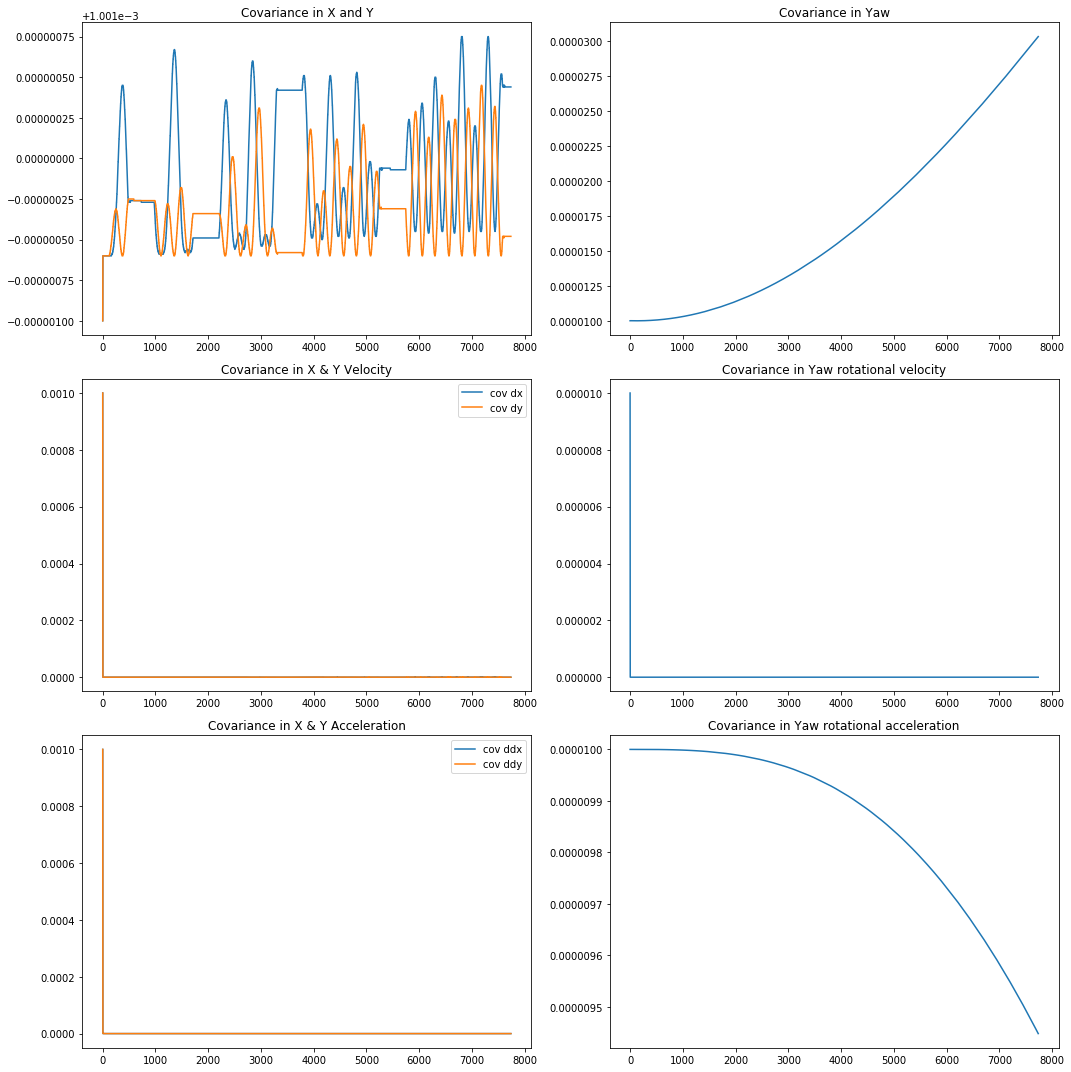

In [56]:
fig, ax = plt.subplots(3,2,figsize=(15,15))
ax[0,0].plot(cov_x, label='cov x')
ax[0,0].plot(cov_y, label='cov y')
ax[0,0].set_title("Covariance in X and Y")

ax[1,0].plot(cov_dx, label='cov dx')
ax[1,0].plot(cov_dy, label='cov dy')
ax[1,0].set_title("Covariance in X & Y Velocity")
ax[1,0].legend()

ax[2,0].plot(cov_ddx, label='cov ddx')
ax[2,0].plot(cov_ddy, label='cov ddy')
ax[2,0].set_title("Covariance in X & Y Acceleration")
ax[2,0].legend()

ax[0,1].plot(cov_yaw, label='cov yaw')
ax[0,1].set_title("Covariance in Yaw")

ax[1,1].plot(cov_dyaw, label='cov dyaw')
ax[1,1].set_title("Covariance in Yaw rotational velocity")

ax[2,1].plot(cov_ddyaw, label='cov ddyaw')
ax[2,1].set_title("Covariance in Yaw rotational acceleration")

plt.tight_layout()
plt.show()